# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [ ]:
#Importation des modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

%matplotlib inline

C:\Users\antho\AppData\Local\Temp\ipykernel_19176\3226917151.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_sports.index, y=top5_sports.values, palette="viridis")


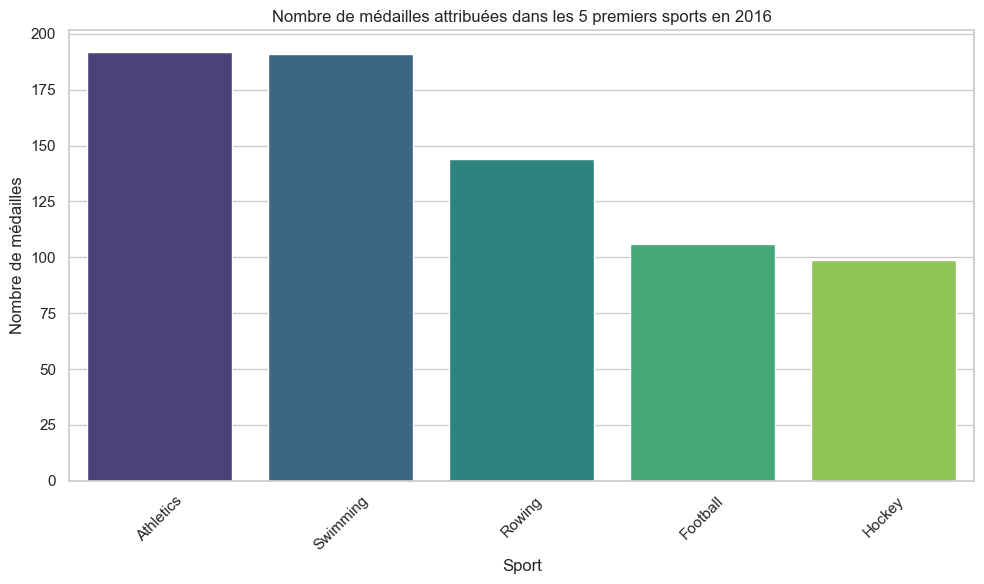

Les 5 sports avec le plus de médailles en 2016:
Sport
Athletics    192
Swimming     191
Rowing       144
Football     106
Hockey        99
Name: count, dtype: int64


In [ ]:
#Question 1
df = pd.read_csv('athlete_events.csv')

medailles_2016 = df[(df['Year'] == 2016) & (df['Medal'].notnull())]

medailles_par_sport = medailles_2016['Sport'].value_counts()

top5_sports = medailles_par_sport.nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_sports.index, y=top5_sports.values, palette="viridis")
plt.title('Nombre de médailles attribuées dans les 5 premiers sports en 2016')
plt.xlabel('Sport')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Les 5 sports avec le plus de médailles en 2016:")
print(top5_sports)

top5_sports_liste = top5_sports.index.tolist()
medailles_top5_sports = medailles_2016[medailles_2016['Sport'].isin(top5_sports_liste)]

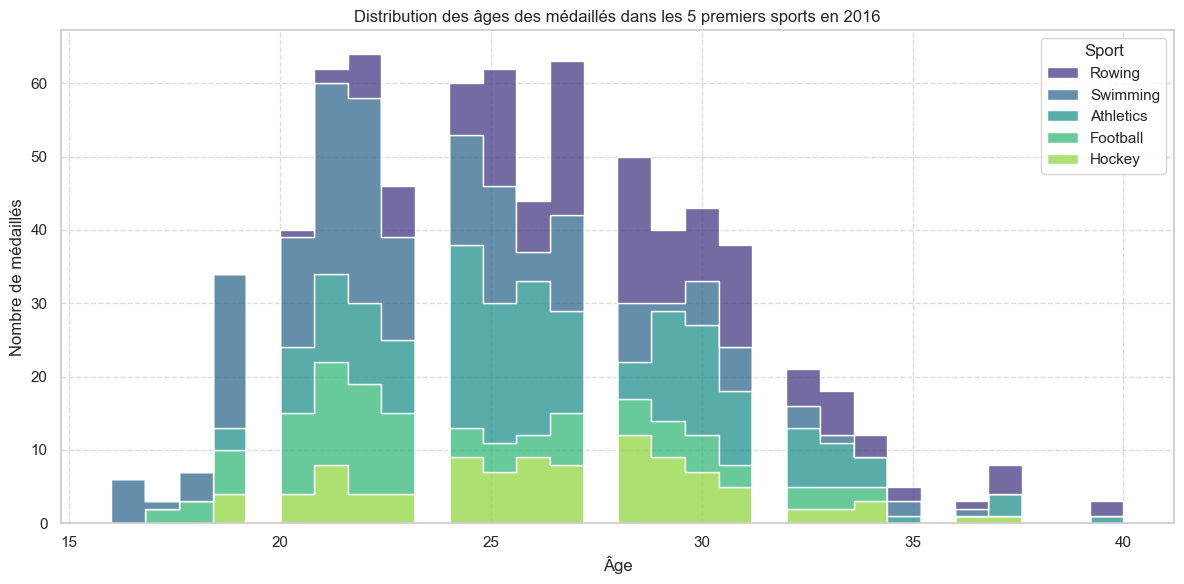

Statistiques d'âge par sport pour les médaillés de 2016:
           count       mean       std   min   25%   50%    75%   max
Sport                                                               
Athletics  192.0  26.411458  4.131665  19.0  24.0  26.0  29.25  40.0
Football   106.0  24.084906  4.336156  17.0  21.0  23.0  27.00  34.0
Hockey      99.0  26.383838  4.072574  19.0  24.0  27.0  29.00  37.0
Rowing     144.0  28.125000  3.871855  20.0  25.0  28.0  31.00  40.0
Swimming   191.0  23.230366  4.013047  16.0  21.0  22.0  25.00  36.0


In [4]:
#Question 2 
plt.figure(figsize=(12, 6))
sns.histplot(data=medailles_top5_sports, x="Age", hue="Sport", element="step", 
             bins=30, multiple="stack", palette="viridis")
plt.title('Distribution des âges des médaillés dans les 5 premiers sports en 2016')
plt.xlabel('Âge')
plt.ylabel('Nombre de médaillés')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

stats_age = medailles_top5_sports.groupby('Sport')['Age'].describe()
print("Statistiques d'âge par sport pour les médaillés de 2016:")
print(stats_age)


C:\Users\antho\AppData\Local\Temp\ipykernel_19176\3170891727.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_pays.index, y=top10_pays.values, palette="viridis")


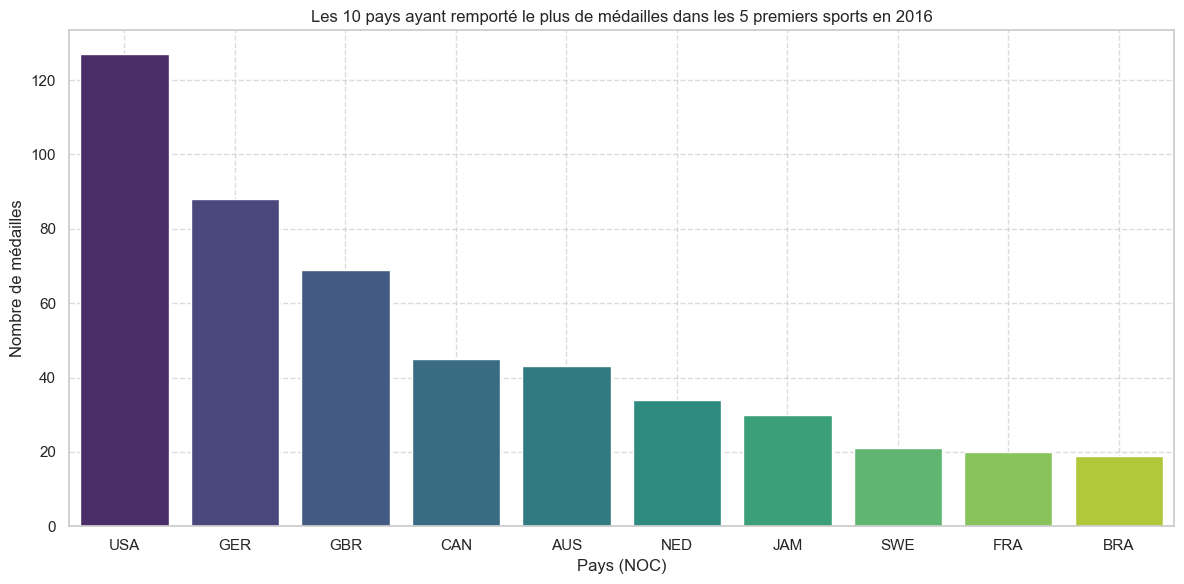

Les 10 pays avec le plus de médailles dans les 5 premiers sports en 2016:
NOC
USA    127
GER     88
GBR     69
CAN     45
AUS     43
NED     34
JAM     30
SWE     21
FRA     20
BRA     19
dtype: int64


In [5]:
#Question 3
medailles_par_pays = medailles_top5_sports.groupby('NOC').size().sort_values(ascending=False)

top10_pays = medailles_par_pays.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_pays.index, y=top10_pays.values, palette="viridis")
plt.title('Les 10 pays ayant remporté le plus de médailles dans les 5 premiers sports en 2016')
plt.xlabel('Pays (NOC)')
plt.ylabel('Nombre de médailles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Les 10 pays avec le plus de médailles dans les 5 premiers sports en 2016:")
print(top10_pays)

<Figure size 1200x600 with 0 Axes>

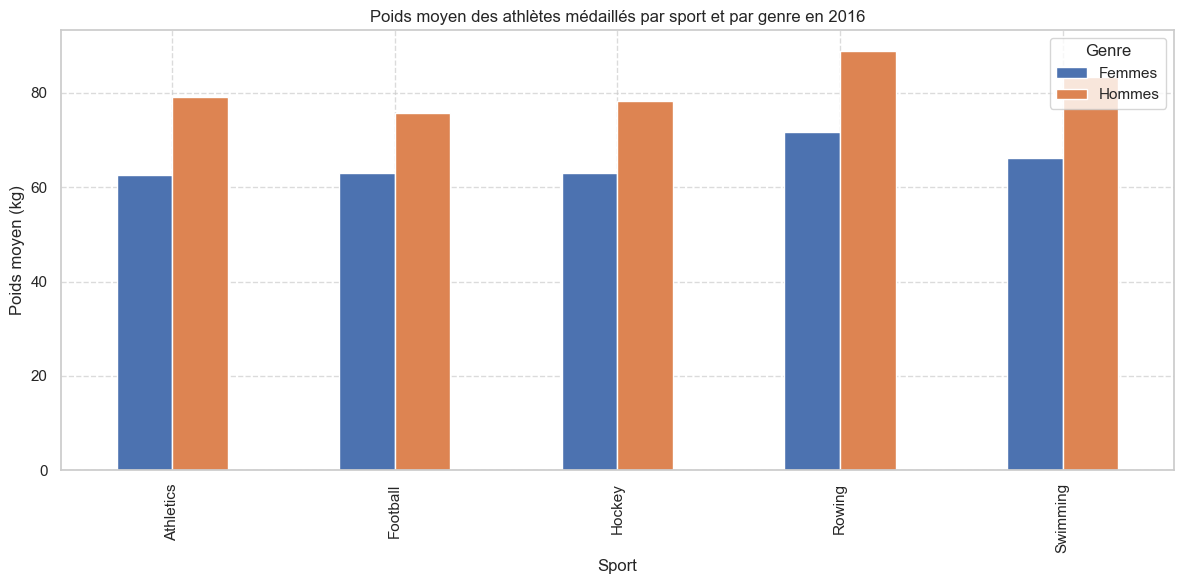

Poids moyen des athlètes médaillés par sport et par genre en 2016:
              Femmes     Hommes
Sport                          
Athletics  62.578947  79.074468
Football   62.962963  75.725490
Hockey     63.061224  78.380000
Rowing     71.766667  88.833333
Swimming   66.195876  83.408602


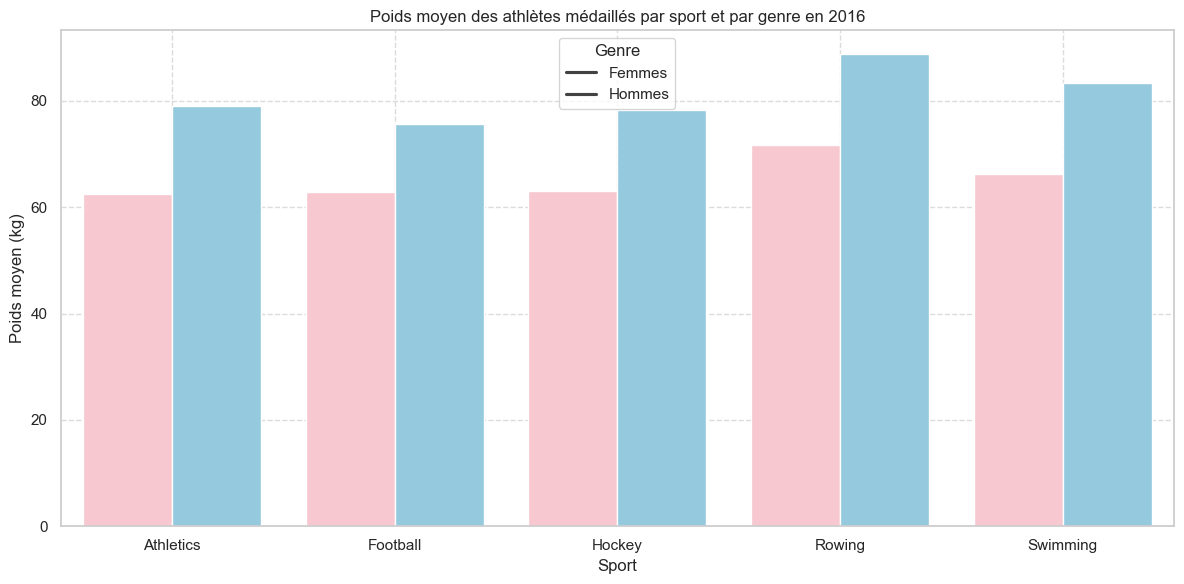

In [6]:
#Question 4
poids_moyen = medailles_top5_sports.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()

poids_pivot = poids_moyen.pivot(index='Sport', columns='Sex', values='Weight')
poids_pivot.columns = ['Femmes', 'Hommes']

plt.figure(figsize=(12, 6))
poids_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Poids moyen des athlètes médaillés par sport et par genre en 2016')
plt.xlabel('Sport')
plt.ylabel('Poids moyen (kg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

print("Poids moyen des athlètes médaillés par sport et par genre en 2016:")
print(poids_pivot)

plt.figure(figsize=(12, 6))
sns.barplot(data=poids_moyen, x='Sport', y='Weight', hue='Sex', palette=['pink', 'skyblue'])
plt.title('Poids moyen des athlètes médaillés par sport et par genre en 2016')
plt.xlabel('Sport')
plt.ylabel('Poids moyen (kg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Genre', labels=['Femmes', 'Hommes'])
plt.tight_layout()
plt.show()

In [7]:
# Question high level 1-2
df = pd.read_csv('athlete_events.csv')
medailles_2016 = df[(df['Year'] == 2016) & (df['Medal'].notnull())]

In [8]:
# Question high level 3-4
medailles_par_sport = medailles_2016['Sport'].value_counts()
top5_sports = medailles_par_sport.nlargest(5)
top5_sports_liste = top5_sports.index.tolist()
medailles_top5_sports = medailles_2016[medailles_2016['Sport'].isin(top5_sports_liste)]

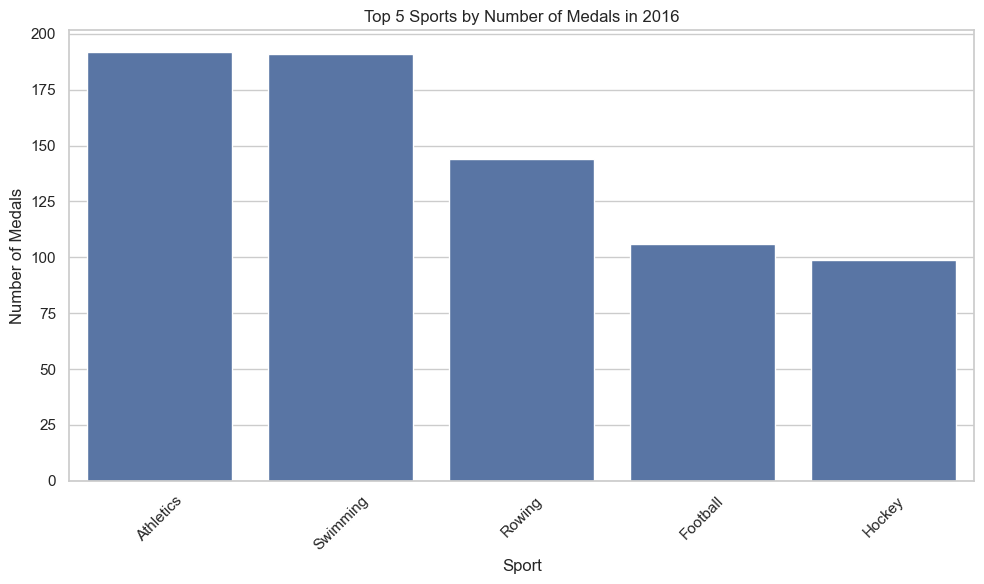

In [9]:
# Question high level 5
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_sports.index, y=top5_sports.values)
plt.title('Top 5 Sports by Number of Medals in 2016')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

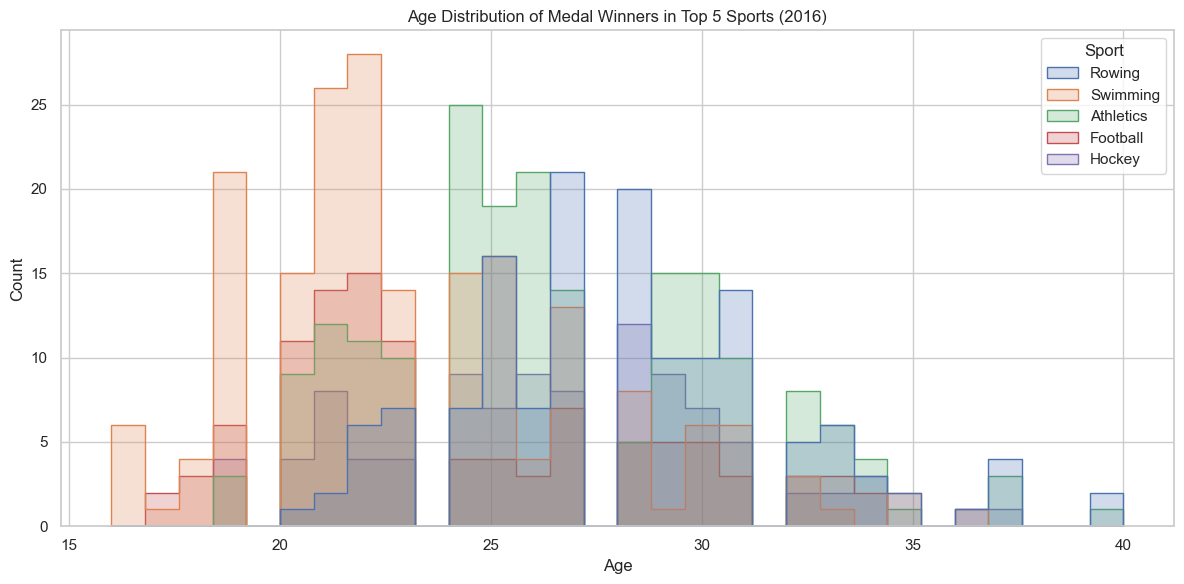

In [10]:
# Question high level 6
plt.figure(figsize=(12, 6))
sns.histplot(data=medailles_top5_sports, x="Age", hue="Sport", element="step", bins=30)
plt.title('Age Distribution of Medal Winners in Top 5 Sports (2016)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

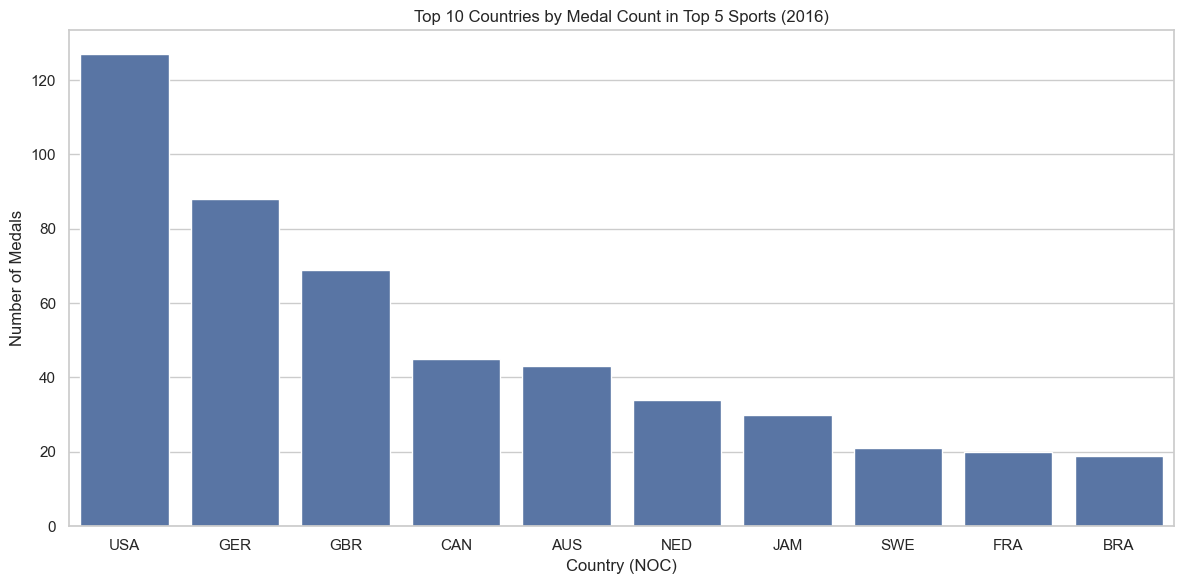

In [11]:
# Question high level 7
medailles_par_pays = medailles_top5_sports.groupby('NOC').size().sort_values(ascending=False)
top10_pays = medailles_par_pays.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_pays.index, y=top10_pays.values)
plt.title('Top 10 Countries by Medal Count in Top 5 Sports (2016)')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()

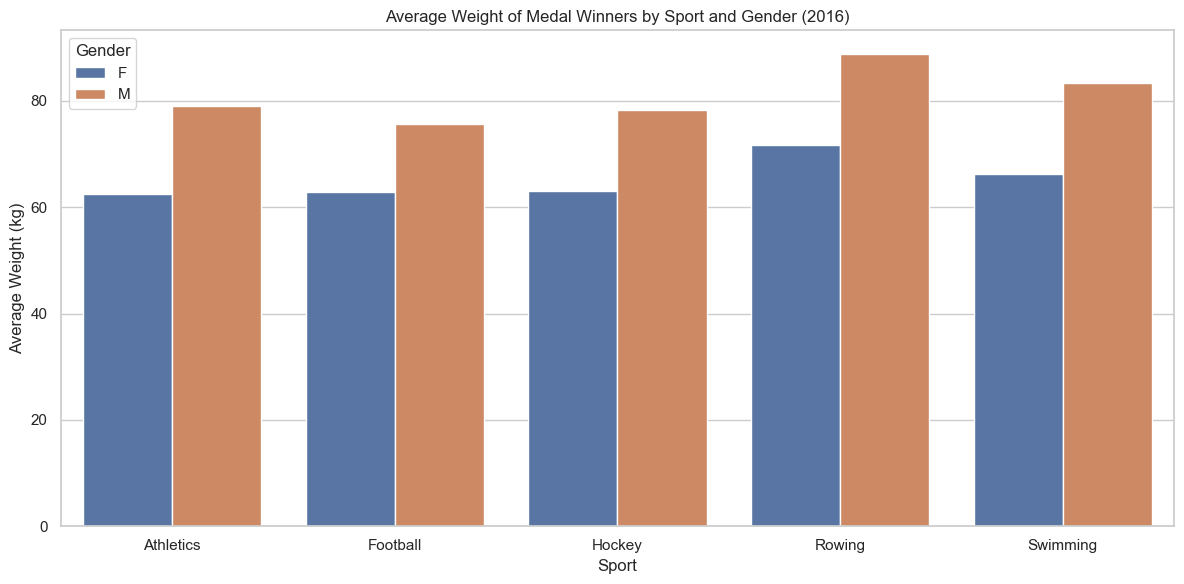

In [12]:
# Question high level 8
poids_moyen = medailles_top5_sports.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=poids_moyen, x='Sport', y='Weight', hue='Sex')
plt.title('Average Weight of Medal Winners by Sport and Gender (2016)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()